# 1.numpyOp

In [1]:
import torch
import numpy as np

In [28]:
x = np.array([[1,2,3],[4,5,6]])

In [3]:
x.ndim

2

In [4]:
x.shape

(2, 3)

In [5]:
x.size

6

In [7]:
np.sum(x,axis=0).shape

(3,)

In [8]:
np.sqrt(x)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [9]:
np.exp(x)

array([[  2.71828183,   7.3890561 ,  20.08553692],
       [ 54.59815003, 148.4131591 , 403.42879349]])

In [10]:
x.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
x.flatten()

array([1, 2, 3, 4, 5, 6])

In [12]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [22]:
x = np.random.rand(3,4,5).shape

In [29]:
x = torch.FloatTensor(x)

In [30]:
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [31]:
x.shape

torch.Size([2, 3])

In [32]:
torch.sum(x,dim=0)

tensor([5., 7., 9.])

In [33]:
x.transpose(1,0)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [34]:
x.transpose(1,0)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [36]:
x.flatten??

Docstring:
flatten(start_dim=0, end_dim=-1) -> Tensor

See :func:`torch.flatten`
Type:      builtin_function_or_method

# 2.Softmax

In [37]:
import torch
import numpy

In [38]:
"""
softmax计算
"""

'\nsoftmax计算\n'

In [39]:
def softmax(x):
    res = []
    for i in x:
        res.append(numpy.exp(i))
    res = [r / sum(res) for r in res]
    return res

In [40]:
numpy.exp(1)

2.718281828459045

In [41]:
numpy.exp(2)

7.38905609893065

In [42]:
x = numpy.array([1,2,3])

In [43]:
softmax(x)

[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]

In [48]:
print(torch.softmax(torch.Tensor(x),dim=0))

tensor([0.0900, 0.2447, 0.6652])


# 3.CrossEntropy

In [75]:
import torch
import torch.nn as nn
import numpy as np

In [51]:
'''
手动实现交叉熵的计算
'''

'\n手动实现交叉熵的计算\n'

In [76]:
#使用torch计算交叉熵
ce_loss = nn.CrossEntropyLoss()

In [77]:
#假设有3个样本，每个都在做3分类
pred = torch.FloatTensor([[0.3,0.1,0.3],
                          [0.9,0.05,0.05],
                          [0.5,0.4,0.2]])

In [78]:
# 正确类别分别为1，2，0

In [79]:
target = torch.LongTensor([1,2,0])

In [80]:
loss = ce_loss(pred, target)

In [81]:
loss

tensor(1.2257)

In [82]:
#实现softmax函数
def softmax(matrix):
    return np.exp(matrix) / np.sum(np.exp(matrix), axis=1, keepdims=True)

In [83]:
# Tip 这里 keepdims 意为保持维度
x = np.array([[1,2,3],
              [4,5,6]])
x_sum = np.sum(x, axis=0)
x_sum2 = np.sum(x,axis=0, keepdims=True)

In [84]:
print(x_sum) # [3]
print(x_sum2)  # [1,3]

[5 7 9]
[[5 7 9]]


In [85]:
def to_one_hot(target, shape):
    one_hot_target = np.zeros(shape)
    for i,t in enumerate(target):
        one_hot_target[i][t] = 1
    return one_hot_target

In [87]:
pred

tensor([[0.3000, 0.1000, 0.3000],
        [0.9000, 0.0500, 0.0500],
        [0.5000, 0.4000, 0.2000]])

In [88]:
softmax(pred.numpy())

array([[0.3547696 , 0.2904608 , 0.3547696 ],
       [0.539133  , 0.2304335 , 0.2304335 ],
       [0.37797815, 0.34200877, 0.2800131 ]], dtype=float32)

In [89]:
def cross_entropy(pred, target):
    batch_size, class_num = pred.shape
    pred = softmax(pred)
    print(pred)
    target = to_one_hot(target, pred.shape)
    entropy = - np.sum(target * np.log(pred), axis=1)
    return sum(entropy) / batch_size

In [90]:
cross_entropy(pred.numpy(), target.numpy())

[[0.3547696  0.2904608  0.3547696 ]
 [0.539133   0.2304335  0.2304335 ]
 [0.37797815 0.34200877 0.2800131 ]]


1.2256661653518677

# 4.DNNforward

In [91]:
#coding:utf8

import torch
import torch.nn as nn
import numpy as np


In [92]:
"""
numpy手动实现模拟一个线性层
"""

#搭建一个2层的神经网络模型
#每层都是线性层

'\nnumpy手动实现模拟一个线性层\n'

In [93]:
class TorchModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(TorchModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2) # 5 * 2

    def forward(self, x):
        x = self.layer1(x)   #shape: (batch_size, input_size) -> (batch_size, hidden_size1) 
        y_pred = self.layer2(x) #shape: (batch_size, hidden_size1) -> (batch_size, hidden_size2) 
        return y_pred 

In [94]:
#自定义模型
class DiyModel:
    def __init__(self, w1, b1, w2, b2):
        self.w1 = w1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2

    def forward(self, x):
        hidden = np.dot(x, self.w1.T) + self.b1 #1*5
        y_pred = np.dot(hidden, self.w2.T) + self.b2 #1*2
        return y_pred

In [95]:
#随便准备一个网络输入
x = np.array([[3.1, 1.3, 1.2],
              [2.1, 1.3, 13]])

In [96]:
#建立torch模型
torch_model = TorchModel(3, 5, 2)

In [98]:
torch_model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4007, -0.2930,  0.3913],
                      [-0.0142, -0.3785,  0.1801],
                      [ 0.1729, -0.0227,  0.1753],
                      [ 0.5553,  0.5516, -0.4804],
                      [ 0.1247,  0.1266,  0.1905]])),
             ('layer1.bias',
              tensor([-0.4322,  0.3809, -0.0446, -0.3093, -0.5108])),
             ('layer2.weight',
              tensor([[ 0.0319, -0.0635,  0.2252, -0.1851,  0.1906],
                      [ 0.1623,  0.3518, -0.4289,  0.2526, -0.3399]])),
             ('layer2.bias', tensor([0.2456, 0.0129]))])

In [102]:
torch_model_w1 = torch_model.state_dict()['layer1.weight'].numpy()

In [104]:
#打印模型权重，权重为随机初始化
torch_model_w1 = torch_model.state_dict()["layer1.weight"].numpy()
torch_model_b1 = torch_model.state_dict()["layer1.bias"].numpy()
torch_model_w2 = torch_model.state_dict()["layer2.weight"].numpy()
torch_model_b2 = torch_model.state_dict()["layer2.bias"].numpy()
print(torch_model_w1, "torch w1 权重")
print(torch_model_b1, "torch b1 权重")
print("-----------")
print(torch_model_w2, "torch w2 权重")
print(torch_model_b2, "torch b2 权重")
print("-----------")

[[ 0.40067965 -0.2929584   0.39127517]
 [-0.0142241  -0.37850785  0.18005037]
 [ 0.17285115 -0.02269335  0.175297  ]
 [ 0.5552606   0.5516181  -0.48043093]
 [ 0.12473792  0.12660639  0.19050358]] torch w1 权重
[-0.43215555  0.38092595 -0.04461476 -0.30930185 -0.51084715] torch b1 权重
-----------
[[ 0.03188037 -0.06350868  0.22515813 -0.1851046   0.19063571]
 [ 0.1623491   0.35180897 -0.42890143  0.25264424 -0.33990866]] torch w2 权重
[0.24561757 0.01290529] torch b2 权重
-----------


In [105]:
torch_model_b1.shape

(5,)

In [106]:
#使用torch模型做预测
torch_x = torch.FloatTensor(x)
y_pred = torch_model.forward(torch_x)
print("torch模型预测结果：", y_pred)

torch模型预测结果： tensor([[ 0.1856,  0.1928],
        [ 2.1679, -1.4776]], grad_fn=<AddmmBackward0>)


In [107]:

# #把torch模型权重拿过来自己实现计算过程
diy_model = DiyModel(torch_model_w1, torch_model_b1, torch_model_w2, torch_model_b2)
# #用自己的模型来预测
y_pred_diy = diy_model.forward(np.array(x))
print("diy模型预测结果：", y_pred_diy)

diy模型预测结果： [[ 0.1856224   0.19275035]
 [ 2.16794354 -1.47755979]]


In [109]:
x.shape

(2, 3)

In [110]:
np.dot(np.array(x),torch_model_w1.T)

array([[ 1.33079118, -0.32009447,  0.7166936 ,  1.86189427,  0.77988015],
       [ 5.54715851,  1.81872403,  2.61234713, -4.36245131,  2.90308451]])

# 5.Gradient Descent

In [112]:
import matplotlib.pyplot as pyplot
import math
import sys



[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]
[4.0, 4.0302, 4.0608, 4.0918, 4.1232, 4.155, 4.1872, 4.2198, 4.2528, 4.2862, 4.32, 4.3542, 4.3888, 4.4238, 4.4592, 4.495, 4.5312, 4.5678, 4.6048, 4.6422, 4.68, 4.7181999999999995, 4.7568, 4.7958, 4.8352, 4.875, 4.9152000000000005, 4.9558, 4.9968, 5.0382, 5.08, 5.12

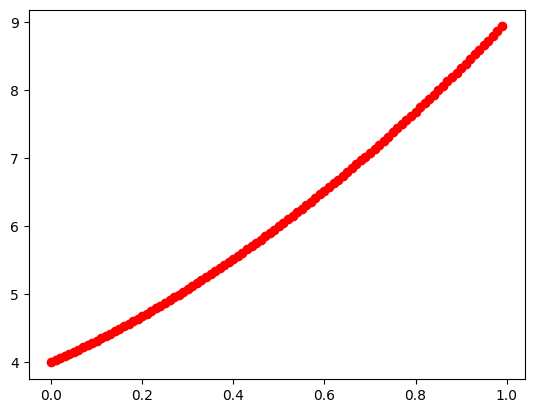

In [113]:
X = [0.01 * x for x in range(100)]
Y = [2*x**2 + 3*x + 4 for x in X]
print(X)
print(Y)
pyplot.scatter(X, Y, color='red')
pyplot.show()

In [114]:
def func(x):
    y = w1 * x ** 2 + w2 *x +w3
    return y

In [117]:

def loss(y_pred, y_true):
    return (y_pred - y_true) ** 2

第0轮， loss 0.299343
第1轮， loss 0.289462
第2轮， loss 0.098739
第3轮， loss 0.032223
第4轮， loss 0.009726
第5轮， loss 0.002547
第6轮， loss 0.000525
第7轮， loss 0.000134
第8轮， loss 0.000189
第9轮， loss 0.000321
第10轮， loss 0.000429
第11轮， loss 0.000498
第12轮， loss 0.000536
第13轮， loss 0.000551
第14轮， loss 0.000553
第15轮， loss 0.000547
第16轮， loss 0.000535
第17轮， loss 0.000521
第18轮， loss 0.000506
第19轮， loss 0.000490
第20轮， loss 0.000474
第21轮， loss 0.000458
第22轮， loss 0.000443
第23轮， loss 0.000428
第24轮， loss 0.000413
第25轮， loss 0.000399
第26轮， loss 0.000385
第27轮， loss 0.000372
第28轮， loss 0.000359
第29轮， loss 0.000347
第30轮， loss 0.000335
第31轮， loss 0.000323
第32轮， loss 0.000312
第33轮， loss 0.000301
第34轮， loss 0.000291
第35轮， loss 0.000281
第36轮， loss 0.000271
第37轮， loss 0.000261
第38轮， loss 0.000252
第39轮， loss 0.000244
第40轮， loss 0.000235
第41轮， loss 0.000227
第42轮， loss 0.000219
第43轮， loss 0.000212
第44轮， loss 0.000204
第45轮， loss 0.000197
第46轮， loss 0.000190
第47轮， loss 0.000184
第48轮， loss 0.000178
第49轮， loss 0.000171
第50轮， loss

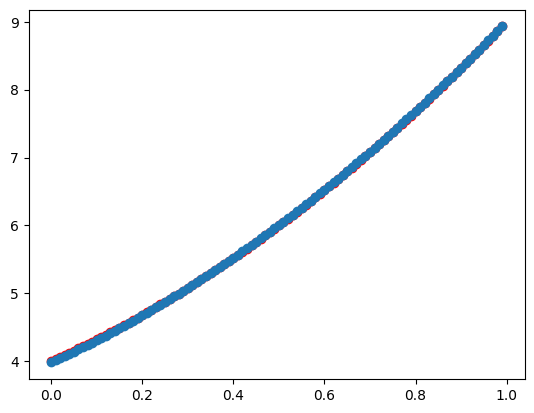

In [118]:

# 权重随机初始化
w1, w2, w3 = -1, 0, 1

# 学习率设置
lr = 0.1

# 训练过程
for epoch in range(1000):
    epoch_loss = 0
    for x, y_true in zip(X, Y):
        y_pred = func(x)
        epoch_loss += loss(y_pred, y_true)
        #梯度计算
        grad_w1 = 2 * (y_pred - y_true) * x ** 2
        grad_w2 = 2 * (y_pred - y_true) * x 
        grad_w3 = 2 * (y_pred - y_true) 
        #权重更新
        w1 = w1 - lr * grad_w1  #sgd 
        w2 = w2 - lr * grad_w2 
        w3 = w3 - lr * grad_w3 
        
    epoch_loss /= len(X)
    print("第%d轮， loss %f" %(epoch, epoch_loss))
    if epoch_loss < 0.00001:
        break

print(f"训练后权重:w1:{w1} w2:{w2} w3:{w3}")

#使用训练后模型输出预测值
Yp = [func(i) for i in X] 

#预测值与真实值比对数据分布
pyplot.scatter(X, Y, color="red")
pyplot.scatter(X, Yp)
pyplot.show()



# 6.homework Torch Demo

In [163]:
import torch
import torch.nn as nn 
import numpy as np
import random
import json
import matplotlib.pyplot as plt

基于pytorch框架编写模型训练
实现一个自行构造的找规律(机器学习)任务
规律：x是一个5维向量，如果第1个数>第5个数，则为正样本，反之为负样本

In [172]:
class TorchModel(nn.Module):
    def __init__(self, input_size):
        super(TorchModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # 线性层
        self.activation = torch.sigmoid  # sigmoid归一化函数
        self.loss = nn.functional.mse_loss  # loss函数采用均方差损失

    # 当输入真实标签，返回loss值；无真实标签，返回预测值
    def forward(self, x, y=None):
        x = self.linear(x)  # (batch_size, input_size) -> (batch_size, 1)
        y_pred = self.activation(x)  # (batch_size, 1) -> (batch_size, 1)
        if y is not None:
            return self.loss(y_pred, y)  # 预测值和真实值计算损失
        else:
            return y_pred  # 输出预测结果

In [173]:

# 生成一个样本, 样本的生成方法，代表了我们要学习的规律
# 随机生成一个5维向量，如果第一个值大于第五个值，认为是正样本，反之为负样本
def build_sample():
    x = np.random.random(5)
    if x[0] > x[4]:
        return x, 1
    else:
        return x, 0

In [174]:

# 随机生成一批样本
# 正负样本均匀生成
def build_dataset(total_sample_num):
    X = []
    Y = []
    for i in range(total_sample_num):
        x, y = build_sample()
        X.append(x)
        Y.append([y])
    return torch.FloatTensor(X), torch.FloatTensor(Y)

In [175]:
# 测试代码
# 用来测试每轮模型的准确率
def evaluate(model):
    model.eval()
    test_sample_num = 100
    x, y = build_dataset(test_sample_num)
    print("本次预测集中共有%d个正样本，%d个负样本" % (sum(y), test_sample_num - sum(y)))
    correct, wrong = 0, 0
    with torch.no_grad():
        y_pred = model(x)  # 模型预测
        for y_p, y_t in zip(y_pred, y):  # 与真实标签进行对比
            if float(y_p) < 0.5 and int(y_t) == 0:
                correct += 1  # 负样本判断正确
            elif float(y_p) >= 0.5 and int(y_t) == 1:
                correct += 1  # 正样本判断正确
            else:
                wrong += 1
    print("正确预测个数：%d, 正确率：%f" % (correct, correct / (correct + wrong)))
    return correct / (correct + wrong)


In [176]:


def main():
    # 配置参数
    epoch_num = 20  # 训练轮数
    batch_size = 20  # 每次训练样本个数
    train_sample = 5000  # 每轮训练总共训练的样本总数
    input_size = 5  # 输入向量维度
    learning_rate = 0.001  # 学习率
    # 建立模型
    model = TorchModel(input_size)
    # 选择优化器
    optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
    log = []
    # 创建训练集，正常任务是读取训练集
    train_x, train_y = build_dataset(train_sample)
    # 训练过程
    for epoch in range(epoch_num):
        model.train()
        watch_loss = []
        for batch_index in range(train_sample // batch_size):    
            x = train_x[batch_index * batch_size : (batch_index + 1) * batch_size]
            y = train_y[batch_index * batch_size : (batch_index + 1) * batch_size]
            loss = model(x, y)  # 计算loss
            loss.backward()  # 计算梯度
            optim.step()  # 更新权重
            optim.zero_grad()  # 梯度归零
            watch_loss.append(loss.item())
        print("=========\n第%d轮平均loss:%f" % (epoch + 1, np.mean(watch_loss)))
        acc = evaluate(model)  # 测试本轮模型结果
        log.append([acc, float(np.mean(watch_loss))])
    # 保存模型
    torch.save(model.state_dict(), "model.pt")
    # 画图
    print(log)
    plt.plot(range(len(log)), [l[0] for l in log], label="acc")  # 画acc曲线
    plt.plot(range(len(log)), [l[1] for l in log], label="loss")  # 画loss曲线
    plt.legend()
    plt.show()
    return

In [177]:
# 使用训练好的模型做预测
def predict(model_path, input_vec):
    input_size = 5
    model = TorchModel(input_size)
    model.load_state_dict(torch.load(model_path))  # 加载训练好的权重
    print(model.state_dict())

    model.eval()  # 测试模式
    with torch.no_grad():  # 不计算梯度
        result = model.forward(torch.FloatTensor(input_vec))  # 模型预测
    for vec, res in zip(input_vec, result):
        print("输入：%s, 预测类别：%d, 概率值：%f" % (vec, round(float(res)), res))  # 打印结果



第1轮平均loss:0.256150
本次预测集中共有51个正样本，49个负样本
正确预测个数：58, 正确率：0.580000
第2轮平均loss:0.239341
本次预测集中共有48个正样本，52个负样本
正确预测个数：85, 正确率：0.850000
第3轮平均loss:0.224263
本次预测集中共有63个正样本，37个负样本
正确预测个数：88, 正确率：0.880000
第4轮平均loss:0.210533
本次预测集中共有54个正样本，46个负样本
正确预测个数：90, 正确率：0.900000
第5轮平均loss:0.198086
本次预测集中共有46个正样本，54个负样本
正确预测个数：92, 正确率：0.920000
第6轮平均loss:0.186839
本次预测集中共有54个正样本，46个负样本
正确预测个数：93, 正确率：0.930000
第7轮平均loss:0.176692
本次预测集中共有45个正样本，55个负样本
正确预测个数：98, 正确率：0.980000
第8轮平均loss:0.167539
本次预测集中共有50个正样本，50个负样本
正确预测个数：97, 正确率：0.970000
第9轮平均loss:0.159274
本次预测集中共有46个正样本，54个负样本
正确预测个数：95, 正确率：0.950000
第10轮平均loss:0.151797
本次预测集中共有53个正样本，47个负样本
正确预测个数：96, 正确率：0.960000
第11轮平均loss:0.145018
本次预测集中共有45个正样本，55个负样本
正确预测个数：100, 正确率：1.000000
第12轮平均loss:0.138855
本次预测集中共有45个正样本，55个负样本
正确预测个数：97, 正确率：0.970000
第13轮平均loss:0.133235
本次预测集中共有50个正样本，50个负样本
正确预测个数：98, 正确率：0.980000
第14轮平均loss:0.128096
本次预测集中共有43个正样本，57个负样本
正确预测个数：100, 正确率：1.000000
第15轮平均loss:0.123383
本次预测集中共有54个正样本，46个负样本
正确预测个数：97, 正确率：0.970000
第16轮平均loss:0.1190

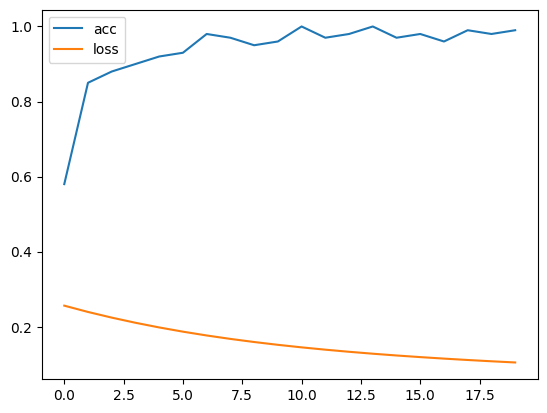

OrderedDict([('linear.weight', tensor([[ 2.9408, -0.0077, -0.1340,  0.0477, -2.8505]])), ('linear.bias', tensor([-0.0252]))])
输入：[0.07889086, 0.15229675, 0.31082123, 0.03504317, 0.18920843], 预测类别：0, 概率值：0.407652
输入：[0.94963533, 0.5524256, 0.95758807, 0.95520434, 0.84890681], 预测类别：1, 概率值：0.564802
输入：[0.78797868, 0.67482528, 0.13625847, 0.34675372, 0.19871392], 预测类别：1, 概率值：0.847961
输入：[0.19349776, 0.59416669, 0.92579291, 0.41567412, 0.7358894], 预测类别：0, 概率值：0.159412


In [178]:

if __name__ == "__main__":
    main()
    test_vec = [[0.07889086,0.15229675,0.31082123,0.03504317,0.18920843],
                [0.94963533,0.5524256,0.95758807,0.95520434,0.84890681],
                [0.78797868,0.67482528,0.13625847,0.34675372,0.19871392],
                [0.19349776,0.59416669,0.92579291,0.41567412,0.7358894]]
    predict("model.pt", test_vec)

# 7.Homework - 5 classification

In [159]:
import torch
import torch.nn as nn 
import numpy as np
import random
import json
import matplotlib.pyplot as plt

In [230]:
class TorchModel(nn.Module):
    def __init__(self, input_size, hidden_len=128):
        super(TorchModel, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_len)  # 线性层
        self.linear2 = nn.Linear(hidden_len, 5)
        self.activation = torch.sigmoid  # sigmoid归一化函数

    # 当输入真实标签，返回loss值；无真实标签，返回预测值
    def forward(self, x, y=None):
        x1 = self.linear1(x)  # (batch_size, input_size) -> (batch_size, 1)
        x2 = self.activation(x1)  # (batch_size, 1) -> (batch_size, 1)
        x3 = self.linear2(x2)
        x4 = self.activation(x3)
        logits = x4
        return logits

In [231]:
loss_fn = nn.CrossEntropyLoss()

In [232]:
# 生成一个样本, 样本的生成方法，代表了我们要学习的规律
# 随机生成一个5维向量，如果第一个值大于第五个值，认为是正样本，反之为负样本
def build_a_sample():
    x = np.random.random(5)
    y = np.argmax(x,axis=0)
    return x,y

In [233]:
build_a_sample()

(array([0.48833906, 0.49082787, 0.84367049, 0.00572083, 0.70968432]), 2)

In [234]:
# 随机生成一批样本
# 正负样本均匀生成
def build_dataset(total_sample_num):
    X = []
    Y = []
    for i in range(total_sample_num):
        x, y = build_a_sample()
        X.append(x)
        Y.append(y)
    return torch.FloatTensor(X), torch.FloatTensor(Y)

In [235]:
trainSet = build_dataset(100000)
testSet = build_dataset(10000)

In [236]:
trainSet

(tensor([[0.8211, 0.8244, 0.7574, 0.8854, 0.0874],
         [0.0532, 0.6339, 0.7593, 0.6670, 0.8932],
         [0.4501, 0.1689, 0.6588, 0.7138, 0.8770],
         ...,
         [0.4440, 0.3111, 0.6210, 0.8022, 0.9158],
         [0.6155, 0.1369, 0.5518, 0.5808, 0.3790],
         [0.0249, 0.3010, 0.8821, 0.2890, 0.1748]]),
 tensor([3., 4., 4.,  ..., 4., 0., 2.]))

In [237]:
model = TorchModel(5, hidden_len=32)

epoch = 20
batch_size = 20
train_sample = 5000
input_size = 5
lr = 1e-3

model = TorchModel(input_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
log = []

train_X, train_Y = build_dataset(train_sample)

In [238]:
def evaluate(model):
    model.eval()

    total = len(testSet[0])
    correct = 0
    X, Y = testSet
    with torch.no_grad():
        logits = model(X)
    pred = logits.argmax(-1)
    correct += torch.sum(pred == Y)
    print("正确预测个数：%d,总数: %d, 正确率：%f" % (correct,total, correct / total))
    return correct / total

In [239]:
evaluate(model)

正确预测个数：1964,总数: 10000, 正确率：0.196400


tensor(0.1964)

In [240]:
def train():
    for epoch_idx in range(epoch):
        model.train()
        watch_loss = []
        for batch_idx in range(train_sample // batch_size):
            x = train_X[batch_idx * batch_size: (batch_idx + 1) * batch_size]
            y = train_Y[batch_idx * batch_size: (batch_idx + 1) * batch_size]
            y = y.long()
            logits = model(x,y)
            loss = loss_fn(logits, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            watch_loss.append(loss.item())
        print("avg loss: {}".format(np.mean(watch_loss)))
        acc = evaluate(model)
        log.append([acc, float(np.mean(watch_loss))])
    torch.save(model.state_dict(), "model5classification.pt")
    print(log)
    plt.plot(range(len(log)), [l[0] for l in log], label="acc")
    plt.plot(range(len(log)), [l[1] for l in log], label="loss")
    plt.legend()
    plt.show()

avg loss: 1.5888963294029237
正确预测个数：4212,总数: 10000, 正确率：0.421200
avg loss: 1.5329469432830811
正确预测个数：7252,总数: 10000, 正确率：0.725200
avg loss: 1.4456887049674987
正确预测个数：8482,总数: 10000, 正确率：0.848200
avg loss: 1.3505856547355652
正确预测个数：9080,总数: 10000, 正确率：0.908000
avg loss: 1.2764432020187377
正确预测个数：9366,总数: 10000, 正确率：0.936600
avg loss: 1.2262466955184936
正确预测个数：9522,总数: 10000, 正确率：0.952200
avg loss: 1.1924420609474182
正确预测个数：9616,总数: 10000, 正确率：0.961600
avg loss: 1.1687662625312805
正确预测个数：9671,总数: 10000, 正确率：0.967100
avg loss: 1.151432463169098
正确预测个数：9696,总数: 10000, 正确率：0.969600
avg loss: 1.1382360992431642
正确预测个数：9726,总数: 10000, 正确率：0.972600
avg loss: 1.1278590211868287
正确预测个数：9745,总数: 10000, 正确率：0.974500
avg loss: 1.1194798650741578
正确预测个数：9754,总数: 10000, 正确率：0.975400
avg loss: 1.1125650625228882
正确预测个数：9768,总数: 10000, 正确率：0.976800
avg loss: 1.1067544569969177
正确预测个数：9769,总数: 10000, 正确率：0.976900
avg loss: 1.101796597957611
正确预测个数：9774,总数: 10000, 正确率：0.977400
avg loss: 1.097510761737823

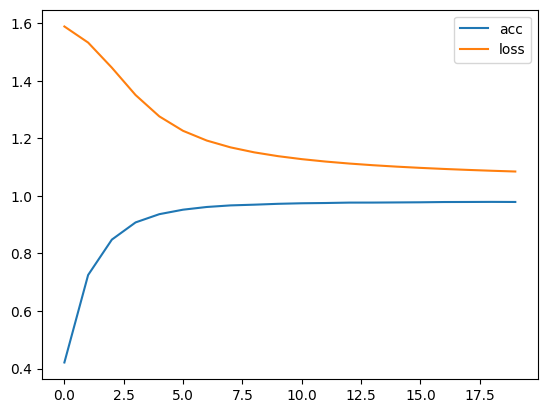

In [241]:
train()